<a href="https://colab.research.google.com/github/IR04dy/ML-models/blob/main/MnistFashion91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(trainin_images, training_labels),(test_images, test_labels)=mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [ ]:
trainin_images.shape

(60000, 28, 28)

In [ ]:
training_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

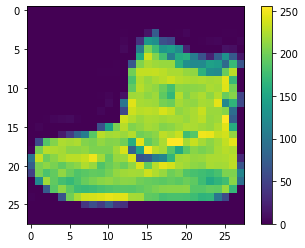

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(trainin_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
trainin_images=trainin_images/255.0
test_images=test_images/255.0

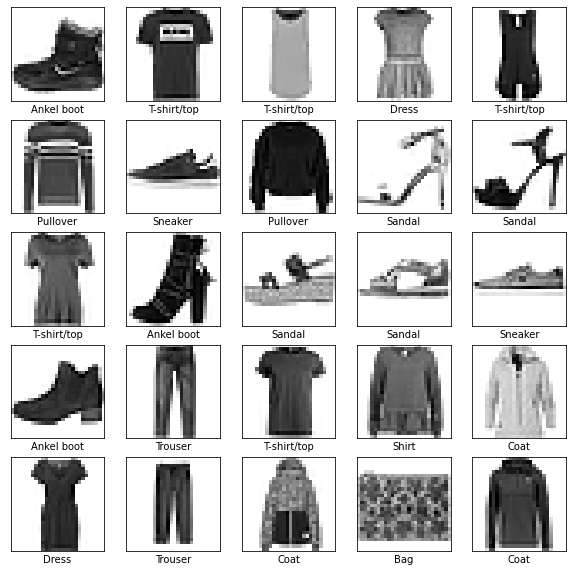

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainin_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
     ]
)

In [ ]:
from tensorflow.python.ops import losses
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(trainin_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4990 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2495 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
test_loss,test_acc=model.evaluate(test_images, test_labels,verbose=2)
print('\nTest accuracy: ', test_acc)


313/313 - 1s - loss: 0.3417 - accuracy: 0.8827 - 772ms/epoch - 2ms/step

Test accuracy:  0.8827000260353088


In [ ]:
import numpy as np

predict=model.predict(test_images)
np.argmax(predict[9])

7

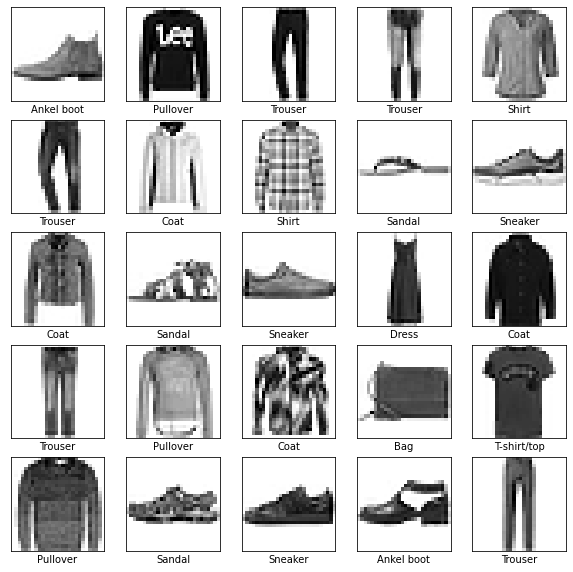

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()